In [32]:
# import the necessary Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **1.Data exploratory**
In the following cell we perform some basic arithmetics in order to get familiar with the data, and its values.

In [4]:
# visualizing the data
data = pd.read_csv("B:\_GITHUB\Machine-Learning-project-series\social media ads analysis\dataset\social_media_ads.csv")
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
# check for null values
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
# check for basic statistics
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [7]:
# data correlation
data.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


### **2. Data visualization**
In the following cells, we will visualise the data as well as its distribution for an in deepth understanding.

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

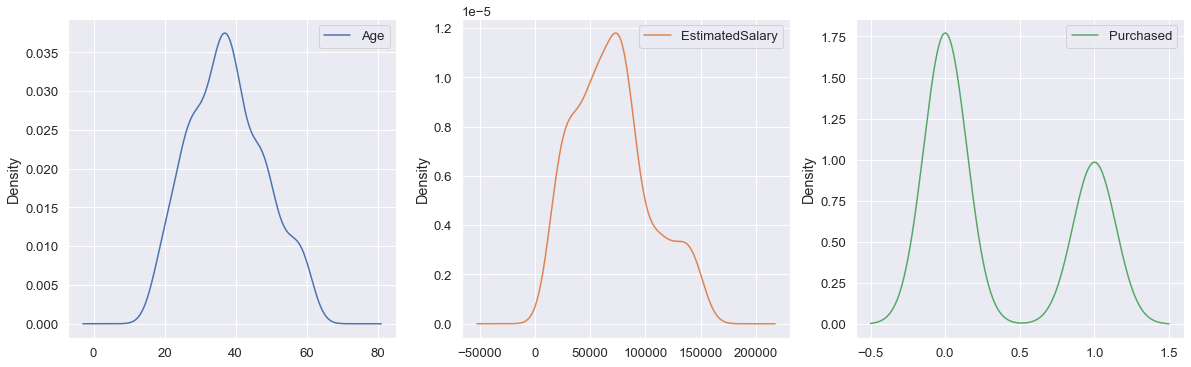

In [37]:
data.plot(kind='density', figsize=(20,20), sharex = False, layout=(3, 3), subplots=True)

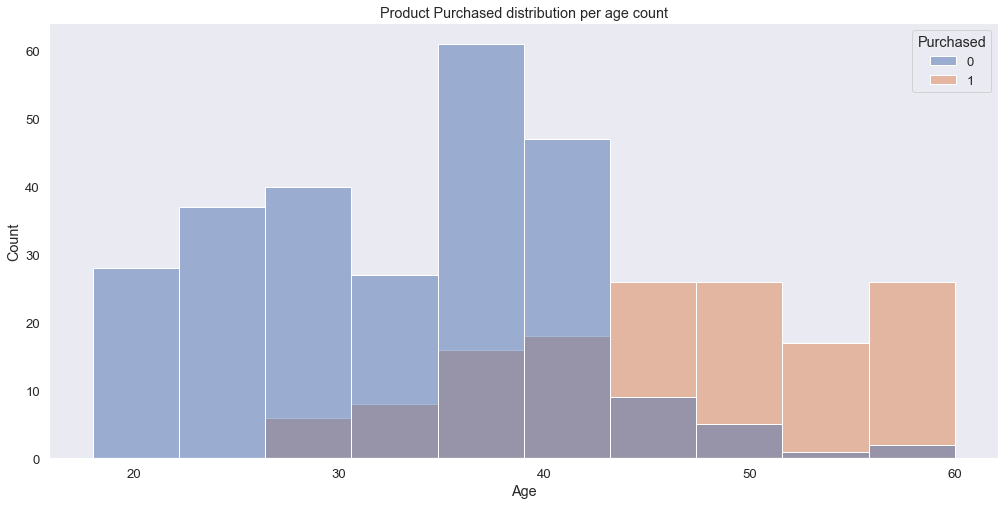

In [62]:
plt.figure(figsize=(17, 8))
plt.title("Product Purchased distribution per age count")
sns.histplot(data = data, x ="Age", hue ="Purchased")
plt.grid(False)
plt.show()

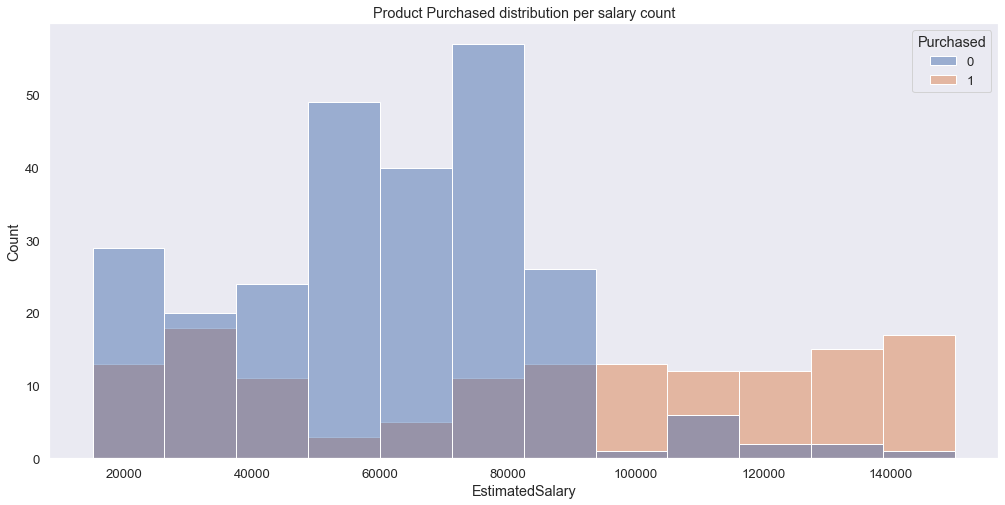

In [64]:
plt.figure(figsize=(17, 8))
plt.title("Product Purchased distribution per salary count")
sns.histplot(data = data, x ="EstimatedSalary", hue ="Purchased")
plt.grid(False)
plt.show()